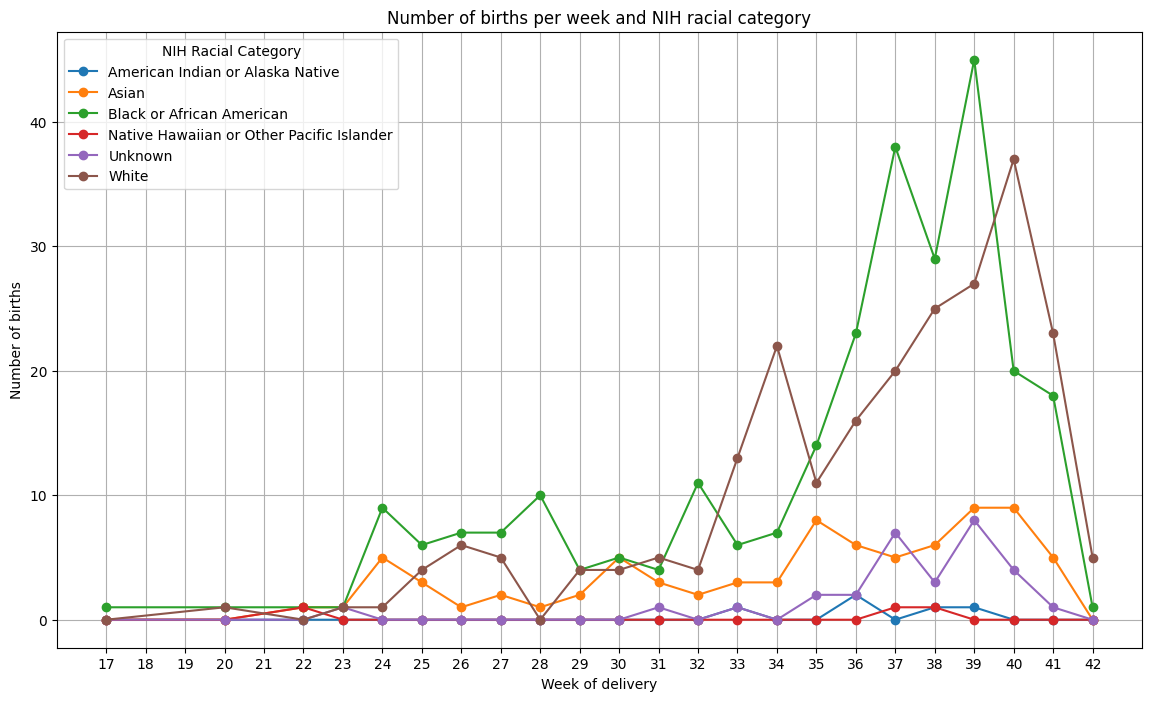

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\Emiliano\Desktop\CodigosTesis\Training\Training\metadata\metadata.csv'
data = pd.read_csv(file_path)

weeks_columns_unique_count = data.groupby(['NIH Racial Category', 'delivery_wk'])['participant_id'].nunique().unstack(fill_value=0)

racial_category_unique_count_stats = data.groupby('NIH Racial Category').agg(
    total_participants=('participant_id', 'nunique'),
    min_delivery_wk=('delivery_wk', 'min'),
    max_delivery_wk=('delivery_wk', 'max'),
    mean_delivery_wk=('delivery_wk', 'mean')
).join(weeks_columns_unique_count, on='NIH Racial Category').reset_index() 


plt.figure(figsize=(14, 8))
for category in racial_category_unique_count_stats['NIH Racial Category']:
    plt.plot(
        weeks_columns_unique_count.columns,
        weeks_columns_unique_count.loc[category],
        marker='o',
        label=category
    )

plt.title('Number of births per week and NIH racial category')
plt.xlabel('Week of delivery')
plt.ylabel('Number of births')
plt.xticks(range(17, 43))
plt.grid(True) 
plt.legend(title='NIH Racial Category')
plt.show()